In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
data = pd.read_csv("merged_cleaned.csv")
data.head()

,title,text,class,text_without_stopwords,title_without_stopwords
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump wish Americans Happy New Year lea...,Donald Trump Sends Out Embarrassing New Year’s...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian C...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,"On Friday, revealed former Milwaukee Sheriff D...",Sheriff David Clarke Becomes An Internet Joke ...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,"On Christmas day, Donald Trump announced would...",Trump Is So Obsessed He Even Has Obama’s Name ...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis used annual Christmas Day message...,Pope Francis Just Called Out Donald Trump Duri...


### Title without stopwords

In [5]:
# Tokenize by word
data['title_tokenized'] = data['title_without_stopwords'].apply(lambda t: word_tokenize(t))
data.head()

,title,text,class,text_without_stopwords,title_without_stopwords,title_tokenized
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump wish Americans Happy New Year lea...,Donald Trump Sends Out Embarrassing New Year’s...,"[Donald, Trump, Sends, Out, Embarrassing, New,..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian C...,"[Drunk, Bragging, Trump, Staffer, Started, Rus..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,"On Friday, revealed former Milwaukee Sheriff D...",Sheriff David Clarke Becomes An Internet Joke ...,"[Sheriff, David, Clarke, Becomes, An, Internet..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,"On Christmas day, Donald Trump announced would...",Trump Is So Obsessed He Even Has Obama’s Name ...,"[Trump, Is, So, Obsessed, He, Even, Has, Obama..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis used annual Christmas Day message...,Pope Francis Just Called Out Donald Trump Duri...,"[Pope, Francis, Just, Called, Out, Donald, Tru..."


In [6]:
# apply pos tagging --- takes about 2.5 mins, depending on machine ---
data['title_tagged'] = data['title_tokenized'].apply(lambda t: nltk.pos_tag(t))
data['title_tagged']

0        [(Donald, NNP), (Trump, NNP), (Sends, VBZ), (O...
1        [(Drunk, NNP), (Bragging, NNP), (Trump, NNP), ...
2        [(Sheriff, NN), (David, NNP), (Clarke, NNP), (...
3        [(Trump, NNP), (Is, VBZ), (So, RB), (Obsessed,...
4        [(Pope, NNP), (Francis, NNP), (Just, NNP), (Ca...
                               ...                        
39100    [('Fully, RB), (committed, VBN), (', ''), (NAT...
39101    [(LexisNexis, NNP), (withdrew, VBD), (two, CD)...
39102    [(Minsk, NNP), (cultural, JJ), (hub, NN), (bec...
39103    [(Vatican, JJ), (upbeat, JJ), (possibility, NN...
39104    [(Indonesia, NNP), (buy, VBP), ($, $), (1.14, ...
Name: title_tagged, Length: 39105, dtype: object

In [7]:
# obtain title pos tags only
data['title_pos_tags'] = data['title_tagged'].apply(lambda t: [pos_tag for _, pos_tag in t])
data['title_pos_tags']

0        [NNP, NNP, VBZ, RP, VBG, NNP, NNP, NNP, VBD, N...
1                 [NNP, NNP, NNP, NNP, NNP, NNP, NNP, NNP]
2        [NN, NNP, NNP, NNP, DT, NNP, NNP, IN, VBG, TO,...
3        [NNP, VBZ, RB, JJ, PRP, RB, NNP, NNP, NNP, NN,...
4        [NNP, NNP, NNP, VBD, RP, NNP, NNP, IN, PRP$, N...
                               ...                        
39100            [RB, VBN, '', NNP, NNS, JJ, NNP, NN, NNP]
39101                          [NNP, VBD, CD, NNS, JJ, NN]
39102                              [NNP, JJ, NN, VBZ, NNS]
39103                     [JJ, JJ, NN, NNP, NNP, VBG, NNP]
39104                   [NNP, VBP, $, CD, CD, NN, JJ, NNS]
Name: title_pos_tags, Length: 39105, dtype: object

In [8]:
# generate frequency distribution for title pos_tags
data['pos_tags_fd'] = data['title_pos_tags'].apply(lambda t: nltk.FreqDist(t))
data['pos_tags_fd']

0        {'NNP': 7, 'VBZ': 1, 'RP': 1, 'VBG': 2, 'VBD':...
1                                               {'NNP': 8}
2        {'NN': 2, 'NNP': 9, 'DT': 2, 'IN': 2, 'VBG': 1...
3        {'NNP': 8, 'VBZ': 1, 'RB': 2, 'JJ': 1, 'PRP': ...
4        {'NNP': 7, 'VBD': 1, 'RP': 1, 'IN': 1, 'PRP$': 1}
                               ...                        
39100    {'RB': 1, 'VBN': 1, '''': 1, 'NNP': 3, 'NNS': ...
39101    {'NNP': 1, 'VBD': 1, 'CD': 1, 'NNS': 1, 'JJ': ...
39102     {'NNP': 1, 'JJ': 1, 'NN': 1, 'VBZ': 1, 'NNS': 1}
39103               {'JJ': 2, 'NN': 1, 'NNP': 3, 'VBG': 1}
39104    {'NNP': 1, 'VBP': 1, '$': 1, 'CD': 2, 'NN': 1,...
Name: pos_tags_fd, Length: 39105, dtype: object

In [9]:
# add class to pos_tags_fd
result = []
for index, row in data.iterrows():
    result.append((row['pos_tags_fd'], row['class']))

result

[(FreqDist({'NNP': 7, 'VBG': 2, 'VBZ': 1, 'RP': 1, 'VBD': 1, ':': 1, 'DT': 1}),
  1),
 (FreqDist({'NNP': 8}), 1),
 (FreqDist({'NNP': 9, 'NN': 2, 'DT': 2, 'IN': 2, 'VBG': 1, 'TO': 1}), 1),
 (FreqDist({'NNP': 8, 'RB': 2, 'NN': 2, 'VBZ': 1, 'JJ': 1, 'PRP': 1, 'PRP$': 1, '(': 1, ')': 1}),
  1),
 (FreqDist({'NNP': 7, 'VBD': 1, 'RP': 1, 'IN': 1, 'PRP$': 1}), 1),
 (FreqDist({'NNP': 8, 'IN': 2, 'JJ': 1, 'PRP': 1, 'VBZ': 1, '(': 1, ')': 1}),
  1),
 (FreqDist({'NNP': 12, 'DT': 1, ',': 1, 'IN': 1, 'CC': 1}), 1),
 (FreqDist({'NNP': 7, 'DT': 2, 'IN': 1, ',': 1, 'CC': 1, 'VBZ': 1, 'VBP': 1, 'PRP': 1, 'RP': 1}),
  1),
 (FreqDist({'NNP': 12, 'VBZ': 2, ',': 1, 'RB': 1, 'PRP': 1, 'JJ': 1, 'IN': 1, '(': 1, ')': 1}),
  1),
 (FreqDist({'NNP': 9, 'PRP': 2, 'NN': 1, ':': 1, 'JJ': 1, 'RB': 1, 'VBG': 1, 'VBP': 1}),
  1),
 (FreqDist({'NNP': 8, 'VBZ': 2, 'VBD': 1, ',': 1, 'RP': 1, 'IN': 1}), 1),
 (FreqDist({'NNP': 8, 'NN': 2, 'IN': 2, 'VBG': 2, ':': 1, 'VBD': 1, 'PRP': 1, 'NNS': 1, 'NNPS': 1}),
  1),
 (FreqDist(

In [10]:
# convert pos_tags_fd to a groupby table
fd = []
for d, c in result:
    for k, v in d.items():
        fd.append((k, v, c))

fd_df = pd.DataFrame(fd, columns=['pos_tag', 'count', 'class']).groupby(['pos_tag', 'class']).sum().reset_index()
fd_df

,pos_tag,class,count
0,#,0,2
1,#,1,474
2,$,0,256
3,$,1,342
4,'',0,1415
...,...,...,...
80,WP,1,659
81,WP$,0,4
82,WRB,0,49
83,WRB,1,1012


In [11]:
# pivot class to compare between real and fake news counts
fd_pivot = pd.DataFrame.pivot_table(fd_df, values='count', index=['pos_tag'], columns=['class'], aggfunc=np.sum, fill_value=0)
fd_pivot

class,0,1
pos_tag,,
#,2,474
$,256,342
'',1415,14
(,103,4022
),103,4022
",",5238,3295
.,383,3854
:,5578,6152
CC,67,2153


In [12]:
fd_pivot = fd_pivot.reset_index()
fd_pivot['real_pc'] = fd_pivot[0] / (fd_pivot[0] + fd_pivot[1])
fd_pivot['fake_pc'] = fd_pivot[1] / (fd_pivot[0] + fd_pivot[1])
fd_pivot['total_pc'] = 1
fd_pivot
# 0 is real, 1 is fake

class,pos_tag,0,1,real_pc,fake_pc,total_pc
0,#,2,474,0.004202,0.995798,1
1,$,256,342,0.428094,0.571906,1
2,'',1415,14,0.990203,0.009797,1
3,(,103,4022,0.024970,0.975030,1
4,),103,4022,0.024970,0.975030,1
5,",",5238,3295,0.613852,0.386148,1
6,.,383,3854,0.090394,0.909606,1
7,:,5578,6152,0.475533,0.524467,1
8,CC,67,2153,0.030180,0.969820,1
9,CD,2976,2468,0.546657,0.453343,1


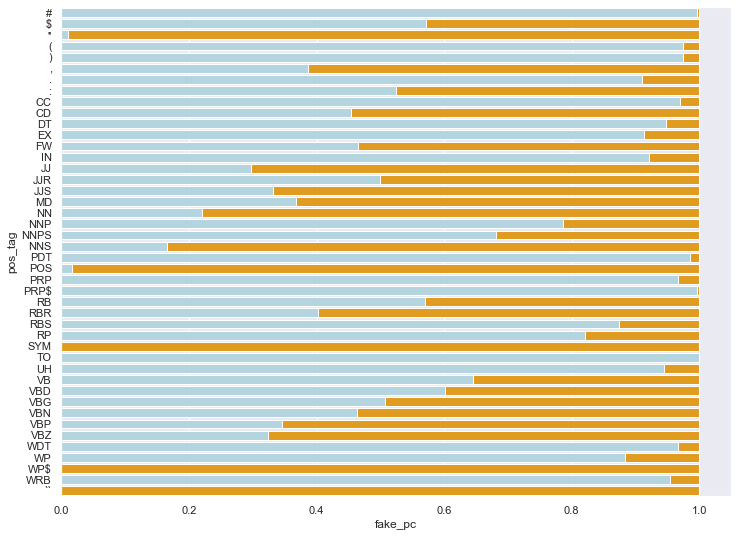

In [13]:
sns.set(rc={'figure.figsize':(12, 9)})
bar1 = sns.barplot(x="total_pc", y="pos_tag", data=fd_pivot, color='orange')
bar2 = sns.barplot(x="fake_pc", y="pos_tag", data=fd_pivot, color='lightblue')

### Text without stopwords

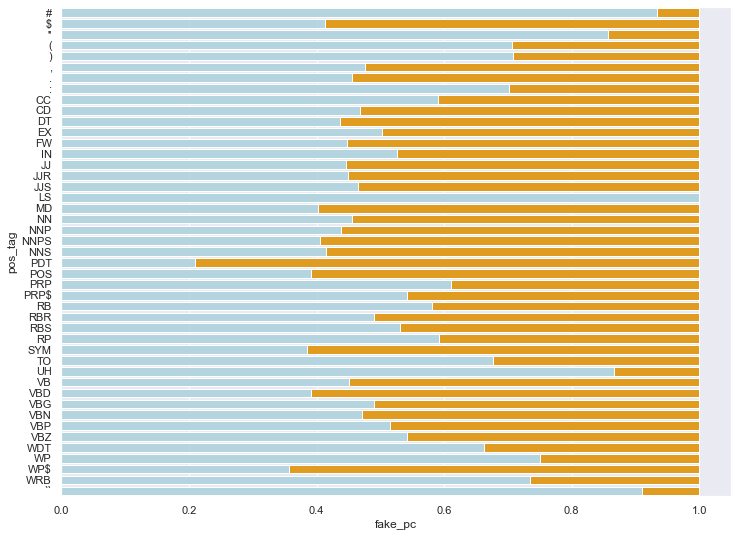

In [14]:
# remove rows with NaN Text
data = data[data['text_without_stopwords'].notna()]
# Tokenize by word
data['text_tokenized'] = data['text_without_stopwords'].apply(lambda t: word_tokenize(t))
# apply pos tagging --- takes about 2.5 mins, depending on machine ---
data['text_tagged'] = data['text_tokenized'].apply(lambda t: nltk.pos_tag(t))
# obtain pos tags only
data['text_pos_tags'] = data['text_tagged'].apply(lambda t: [pos_tag for _, pos_tag in t])
# generate frequency distribution for pos_tags
data['text_pos_tags_fd'] = data['text_pos_tags'].apply(lambda t: nltk.FreqDist(t))
# add class to pos_tags_fd
result = []
for index, row in data.iterrows():
    result.append((row['text_pos_tags_fd'], row['class']))

# convert pos_tags_fd to a groupby table
fd = []
for d, c in result:
    for k, v in d.items():
        fd.append((k, v, c))

text_fd_df = pd.DataFrame(fd, columns=['pos_tag', 'count', 'class']).groupby(['pos_tag', 'class']).sum().reset_index()
# pivot class to compare between real and fake news counts
text_fd_pivot = pd.DataFrame.pivot_table(text_fd_df, values='count', index=['pos_tag'], columns=['class'], aggfunc=np.sum, fill_value=0)
text_fd_pivot = text_fd_pivot.reset_index()
text_fd_pivot['real_pc'] = text_fd_pivot[0] / (text_fd_pivot[0] + text_fd_pivot[1])
text_fd_pivot['fake_pc'] = text_fd_pivot[1] / (text_fd_pivot[0] + text_fd_pivot[1])
text_fd_pivot['total_pc'] = 1

bar1 = sns.barplot(x="total_pc", y="pos_tag", data=text_fd_pivot, color='orange')
bar2 = sns.barplot(x="fake_pc", y="pos_tag", data=text_fd_pivot, color='lightblue')

In [15]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data]   Unzipping help\tagsets.zip.


https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

Alphabetical list of part-of-speech tags used in the Penn Treebank Project:
Number Tag Description
1.	CC	Coordinating conjunction
2.	CD	Cardinal number
3.	DT	Determiner
4.	EX	Existential there
5.	FW	Foreign word
6.	IN	Preposition or subordinating conjunction
7.	JJ	Adjective
8.	JJR	Adjective, comparative
9.	JJS	Adjective, superlative
10.	LS	List item marker
11.	MD	Modal
12.	NN	Noun, singular or mass
13.	NNS	Noun, plural
14.	NNP	Proper noun, singular
15.	NNPS	Proper noun, plural
16.	PDT	Predeterminer
17.	POS	Possessive ending
18.	PRP	Personal pronoun

19.	PRP$	Possessive pronoun

20.	RB	Adverb
21.	RBR	Adverb, comparative
22.	RBS	Adverb, superlative
23.	RP	Particle
24.	SYM	Symbol
25.	TO	to
26.	UH	Interjection
27.	VB	Verb, base form
28.	VBD	Verb, past tense
29.	VBG	Verb, gerund or present participle
30.	VBN	Verb, past participle
31.	VBP	Verb, non-3rd person singular present
32.	VBZ	Verb, 3rd person singular present
33.	WDT	Wh-determiner
34.	WP	Wh-pronoun

35.	WP$	Possessive wh-pronoun

36.	WRB	Wh-adverb

https://www.nltk.org/api/nltk.probability.FreqDist.html